<a href="https://colab.research.google.com/github/RohanNayak12/Fashion-Recommendation/blob/main/FashionRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
paramaggarwal_fashion_product_images_dataset_path = kagglehub.dataset_download('paramaggarwal/fashion-product-images-small')

print('Data source import complete.')


100%|██████████| 565M/565M [00:06<00:00, 97.1MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk(paramaggarwal_fashion_product_images_dataset_path):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pandas as pd
import pickle

In [ ]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False
model=tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
print(model.summary())

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [ ]:
def extract_features(img_path,model):
  img=image.load_img(img_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  expanded_img_array=np.expand_dims(img_array,axis=0)
  preprocessed_img=preprocess_input(expanded_img_array)
  result=model.predict(preprocessed_img).flatten()
  normalized_result=result/norm(result)
  return normalized_result


In [ ]:
images_list=[]
for dirname, _, filenames in os.walk(paramaggarwal_fashion_product_images_dataset_path):
    if(len(filenames)==44441):
      for filename in filenames:
        images_list.append(os.path.join(dirname, filename))
      break

In [25]:
feature_list=[]
for i in tqdm(images_list[0:100]):  #generating embedding for just 100 due to lack of hardware resources for proper training
  feature_list.append(extract_features(i,model))

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  1%|          | 1/100 [00:00<00:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  2%|▏         | 2/100 [00:00<00:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  3%|▎         | 3/100 [00:01<00:41,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  4%|▍         | 4/100 [00:01<00:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  5%|▌         | 5/100 [00:02<00:38,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  6%|▌         | 6/100 [00:02<00:36,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  7%|▋         | 7/100 [00:02<00:36,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  8%|▊         | 8/100 [00:03<00:32,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  9%|▉         | 9/100 [00:03<00:33,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 10%|█         | 10/100 [00:03<00:33,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 11%|█         | 11/100 [00:04<00:33,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 12%|█▏        | 12/100 [00:04<00:33,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 13%|█▎        | 13/100 [00:04<00:30,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 14%|█▍        | 14/100 [00:05<00:28,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 15%|█▌        | 15/100 [00:05<00:28,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 16%|█▌        | 16/100 [00:05<00:26,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 17%|█▋        | 17/100 [00:06<00:27,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 18%|█▊        | 18/100 [00:06<00:28,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 19%|█▉        | 19/100 [00:07<00:29,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 20%|██        | 20/100 [00:07<00:29,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 21%|██        | 21/100 [00:07<00:29,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 22%|██▏       | 22/100 [00:08<00:28,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 23%|██▎       | 23/100 [00:08<00:26,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 24%|██▍       | 24/100 [00:08<00:24,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 25%|██▌       | 25/100 [00:09<00:23,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 26%|██▌       | 26/100 [00:09<00:24,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██▋       | 27/100 [00:09<00:25,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|██▊       | 28/100 [00:10<00:25,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 29%|██▉       | 29/100 [00:10<00:25,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 30%|███       | 30/100 [00:11<00:32,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 31%|███       | 31/100 [00:11<00:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 32%|███▏      | 32/100 [00:12<00:40,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 33%|███▎      | 33/100 [00:13<00:42,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 34%|███▍      | 34/100 [00:13<00:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 35%|███▌      | 35/100 [00:14<00:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 36%|███▌      | 36/100 [00:14<00:28,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 37%|███▋      | 37/100 [00:14<00:26,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|███▊      | 38/100 [00:15<00:23,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 39%|███▉      | 39/100 [00:15<00:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 40%|████      | 40/100 [00:15<00:21,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 41%|████      | 41/100 [00:16<00:21,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 42%|████▏     | 42/100 [00:16<00:21,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 43%|████▎     | 43/100 [00:16<00:21,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 44%|████▍     | 44/100 [00:17<00:20,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 45%|████▌     | 45/100 [00:17<00:20,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 46%|████▌     | 46/100 [00:17<00:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 47%|████▋     | 47/100 [00:18<00:18,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 48%|████▊     | 48/100 [00:18<00:17,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 49%|████▉     | 49/100 [00:18<00:16,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 50%|█████     | 50/100 [00:19<00:16,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|█████     | 51/100 [00:19<00:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 52%|█████▏    | 52/100 [00:19<00:15,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 53%|█████▎    | 53/100 [00:20<00:15,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 54%|█████▍    | 54/100 [00:20<00:16,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 55%|█████▌    | 55/100 [00:21<00:16,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 56%|█████▌    | 56/100 [00:21<00:16,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 57%|█████▋    | 57/100 [00:21<00:15,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 58%|█████▊    | 58/100 [00:22<00:15,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 59%|█████▉    | 59/100 [00:22<00:15,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 60%|██████    | 60/100 [00:22<00:15,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 61%|██████    | 61/100 [00:23<00:14,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 62%|██████▏   | 62/100 [00:23<00:14,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 63%|██████▎   | 63/100 [00:24<00:17,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 64%|██████▍   | 64/100 [00:25<00:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 65%|██████▌   | 65/100 [00:25<00:21,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 66%|██████▌   | 66/100 [00:26<00:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 67%|██████▋   | 67/100 [00:26<00:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 68%|██████▊   | 68/100 [00:27<00:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 69%|██████▉   | 69/100 [00:27<00:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 70%|███████   | 70/100 [00:28<00:14,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 71%|███████   | 71/100 [00:28<00:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 72%|███████▏  | 72/100 [00:28<00:11,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 73%|███████▎  | 73/100 [00:29<00:10,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 74%|███████▍  | 74/100 [00:29<00:10,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 75%|███████▌  | 75/100 [00:29<00:08,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 76%|███████▌  | 76/100 [00:30<00:07,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 77%|███████▋  | 77/100 [00:30<00:07,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 78%|███████▊  | 78/100 [00:30<00:07,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 79%|███████▉  | 79/100 [00:31<00:06,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 80%|████████  | 80/100 [00:31<00:06,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 81%|████████  | 81/100 [00:31<00:06,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 82%|████████▏ | 82/100 [00:32<00:05,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 83%|████████▎ | 83/100 [00:32<00:05,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 84%|████████▍ | 84/100 [00:32<00:05,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 85%|████████▌ | 85/100 [00:33<00:04,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 86%|████████▌ | 86/100 [00:33<00:04,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 87%|████████▋ | 87/100 [00:33<00:04,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 88%|████████▊ | 88/100 [00:34<00:04,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 89%|████████▉ | 89/100 [00:34<00:03,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 90%|█████████ | 90/100 [00:34<00:03,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 91%|█████████ | 91/100 [00:35<00:03,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 92%|█████████▏| 92/100 [00:35<00:02,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 93%|█████████▎| 93/100 [00:35<00:02,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 94%|█████████▍| 94/100 [00:36<00:02,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 95%|█████████▌| 95/100 [00:36<00:01,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 96%|█████████▌| 96/100 [00:36<00:01,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 97%|█████████▋| 97/100 [00:37<00:01,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 98%|█████████▊| 98/100 [00:37<00:00,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 99%|█████████▉| 99/100 [00:38<00:00,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


100%|██████████| 100/100 [00:39<00:00,  2.56it/s]


In [26]:
pickle.dump(images_list,open('images.pkl','wb'))
pickle.dump(feature_list,open('features.pkl','wb'))

In [30]:
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [31]:
curr_img_features=extract_features(images_list[0],model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


In [32]:
distances,indices = neighbors.kneighbors([curr_img_features])
print(indices)

[[ 0 10 17 79 15 23]]


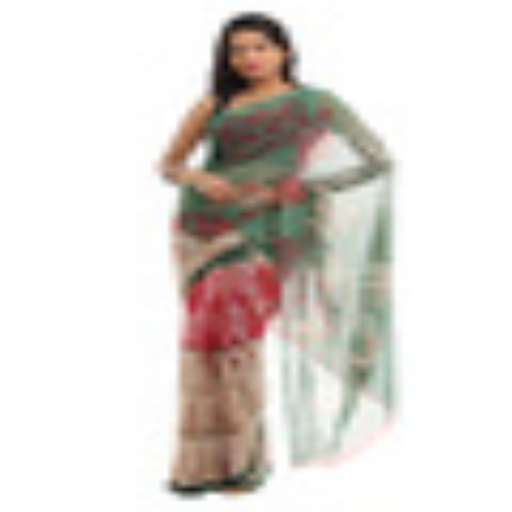

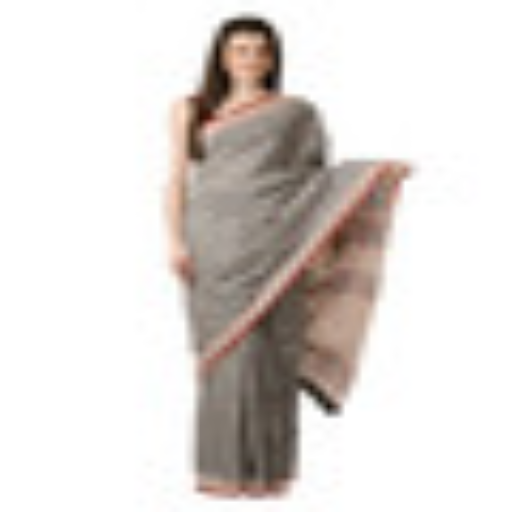

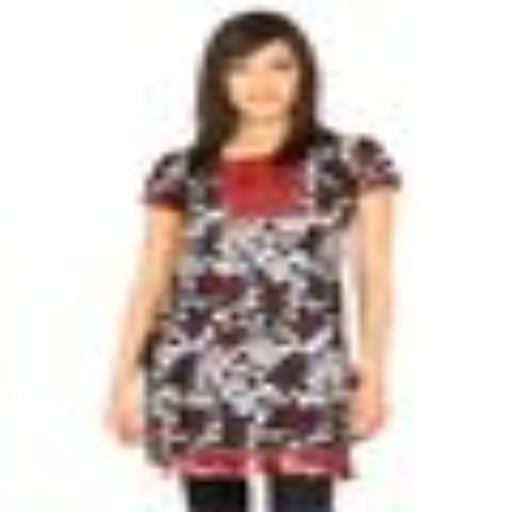

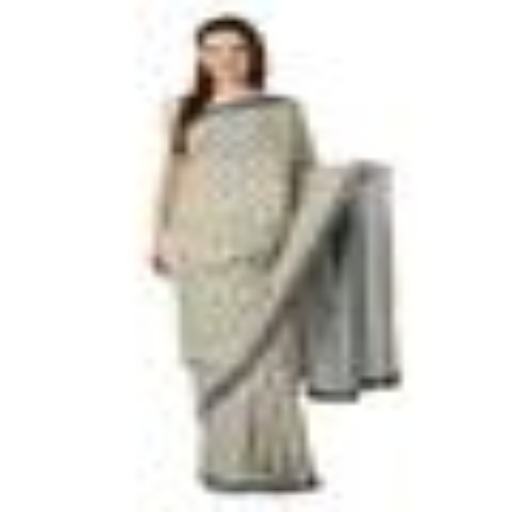

In [36]:
import cv2
from google.colab.patches import cv2_imshow
for i in indices[0][1:5]:
  temp_img = cv2.imread(images_list[i])
  cv2_imshow(cv2.resize(temp_img,(512,512)))
  cv2.waitKey(0)

In [ ]:
ka